
## The Problem Statement:

To build an application to classify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.


#### Features:

1.	Age | Objective Feature | age | int (days)
2.	Height | Objective Feature | height | int (cm) |
3.	Weight | Objective Feature | weight | float (kg) |
4.	Gender | Objective Feature | gender | categorical code |
5.	Systolic blood pressure | Examination Feature | ap_hi | int |
6.	Diastolic blood pressure | Examination Feature | ap_lo | int |
7.	Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8.	Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9.	Smoking | Subjective Feature | smoke | binary |
10.	Alcohol intake | Subjective Feature | alco | binary |
11.	Physical activity | Subjective Feature | active | binary |
12.	Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.tree import DecisionTreeClassifier

In [2]:
# load the data
cardio = pd.read_csv('cardio_train.csv', delimiter=';')
cardio.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0


In [3]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Age, height, weight, ap_hi, ap_lo are continues data

cholesterol, gluc, smoke, alco, active, cardio are categorical data

id is not required column 

In [4]:
cardio.drop(columns=['id'], inplace=True)

In [5]:
cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69301.0,19468.786280,2467.261818,10798.0,17664.0,19704.0,21326.0,23713.0
gender,69301.0,1.349519,0.476821,1.0,1.0,1.0,2.0,2.0
height,69301.0,164.362217,8.205337,55.0,159.0,165.0,170.0,250.0
weight,69301.0,74.203027,14.383469,10.0,65.0,72.0,82.0,200.0
ap_hi,69301.0,128.829584,154.775805,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69301.0,96.650092,189.096240,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69301.0,1.366806,0.680270,1.0,1.0,1.0,2.0,3.0
gluc,69301.0,1.226447,0.572246,1.0,1.0,1.0,1.0,3.0
smoke,69301.0,0.088051,0.283371,0.0,0.0,0.0,0.0,1.0
alco,69301.0,0.053881,0.225784,0.0,0.0,0.0,0.0,1.0


as looking into count column we can see there is no null values present in any column


lets verify 

In [6]:
cardio.isna().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

Age in days is not easy to understand

Lets make new column called year where age in days is converted into age in year 


In [7]:
cardio['age'] = (cardio['age'] / 365).round().astype('int')

Lets Plot a boxplot to check age(age in year)column 

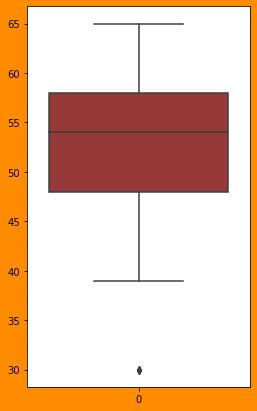

In [8]:
plt.figure(figsize=(4,7), facecolor='DarkOrange')
sns.boxplot(cardio.age, color='Brown');

#### Describe function

Difference between mean and standard deviation shows that there so many variances in data, 

Lets only consider years age above quantile 0.015, they are only few below age 40

Lets consider only 1.5% to 97.5% of weight and height and 1.5% above age


In [9]:
qua_low = cardio.quantile(0.015)
qua_high = cardio.quantile(0.975)

c1 = cardio[(cardio.height > qua_high.height) |
            (cardio.height < qua_low.height) |
            (cardio.weight > qua_high.weight) |
            (cardio.weight < qua_low.weight) |
            (cardio.age < qua_low.age)].index

cardio.drop(c1, inplace=True)

 ap_hi and ap_lo represents blood pressure,
 
 difference between ap_hi and ap_lo show the blood pressure, 
 
 while ap_hi and ap_lo cant be negative

In [10]:
cardio.ap_hi = cardio.ap_hi.abs()
cardio.ap_lo = cardio.ap_lo.abs()

There are some outlier data present in both columns 
 
Lets consider only 1.5% to 97.5% of ap_hi and ap_lo

In [11]:
cardio.drop(cardio[(cardio.ap_hi > qua_high.ap_hi) |
                   (cardio.ap_hi < qua_low.ap_hi) |
                   (cardio.ap_lo > qua_high.ap_lo) | 
                   (cardio.ap_lo < qua_low.ap_lo)].index,inplace=True)


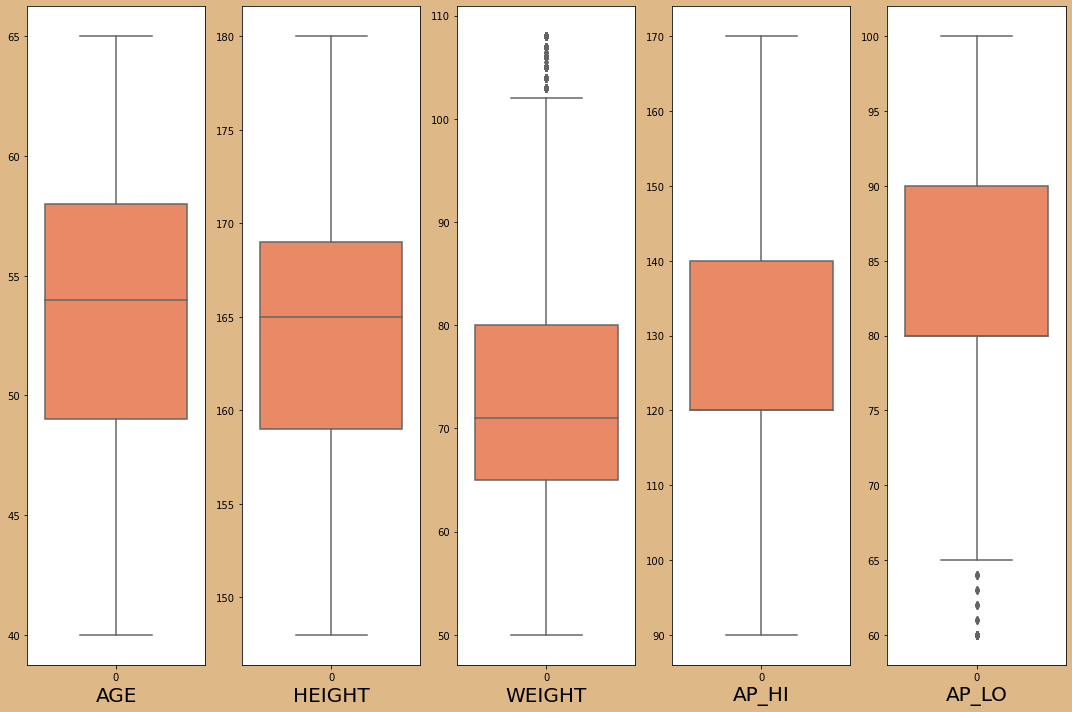

In [12]:
cardio_cont= cardio[['age','height','weight','ap_hi','ap_lo']]

plt.figure(figsize=(15,10), facecolor='BurlyWood')
plotnumber =1

for column in cardio_cont:
    if plotnumber<=5:
        ax=plt.subplot(1,5,plotnumber)
        sns.boxplot(cardio_cont[column], color='Coral')
        plt.xlabel(column.upper(), fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()
plt.show()

In [13]:
cardio.describe().T

,count,mean,std,min,25%,50%,75%,max
age,61902.0,53.400827,6.686393,40.0,49.0,54.0,58.0,65.0
gender,61902.0,1.341104,0.474084,1.0,1.0,1.0,2.0,2.0
height,61902.0,164.313382,6.990518,148.0,159.0,165.0,169.0,180.0
weight,61902.0,73.212112,11.982543,50.0,65.0,71.0,80.0,108.0
ap_hi,61902.0,125.676424,14.823129,90.0,120.0,120.0,140.0,170.0
ap_lo,61902.0,80.899890,8.581824,60.0,80.0,80.0,90.0,100.0
cholesterol,61902.0,1.354205,0.671738,1.0,1.0,1.0,1.0,3.0
gluc,61902.0,1.220300,0.566947,1.0,1.0,1.0,1.0,3.0
smoke,61902.0,0.084876,0.278699,0.0,0.0,0.0,0.0,1.0
alco,61902.0,0.051501,0.221019,0.0,0.0,0.0,0.0,1.0


Ploting continues data vs cardio data 

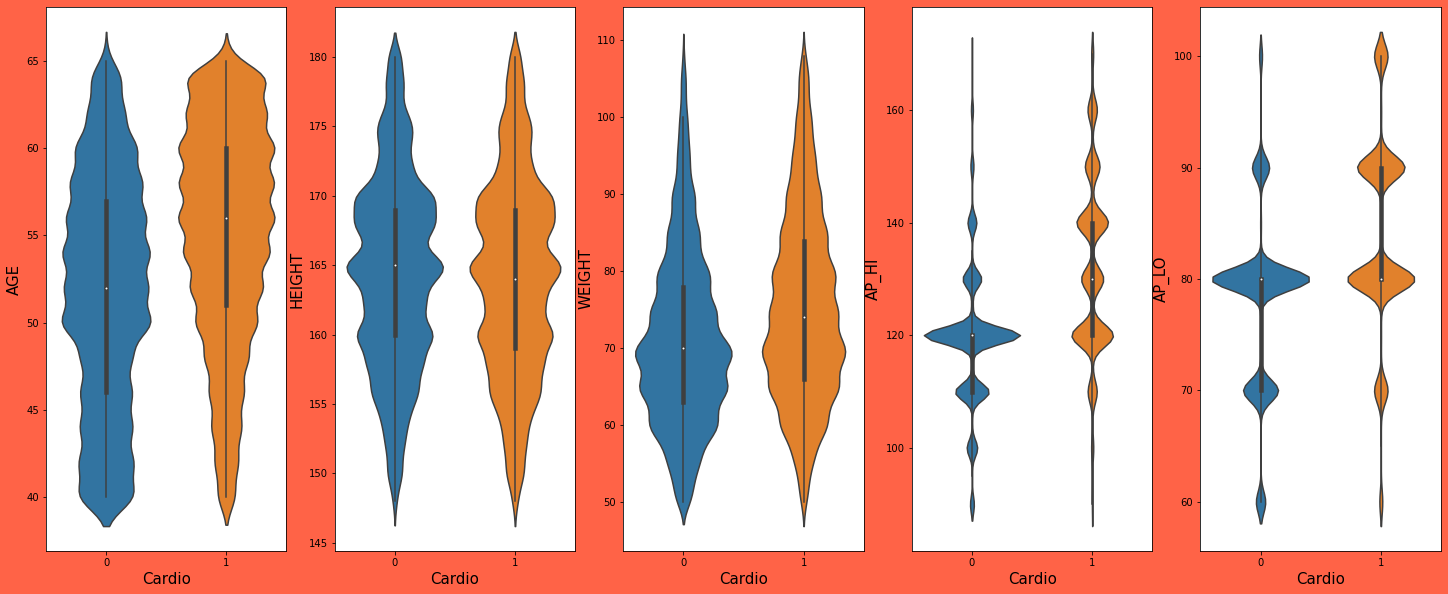

In [14]:
cont= cardio[['age','height','weight','ap_hi','ap_lo']]

plt.figure(figsize=(25,10), facecolor='Tomato')
plotnumber = 1

for columns in cont:
    if plotnumber <=5:
        ax=plt.subplot(1,5,plotnumber)
        #sns.boxenplot(cont[columns])
        sns.violinplot(data=cardio, y=cont[columns], x="cardio")
        plt.ylabel(columns.upper(), fontsize = 15)
        plt.xlabel('Cardio', fontsize= 15)
    plotnumber+=1    


Ploting categorial data vs cardio data 

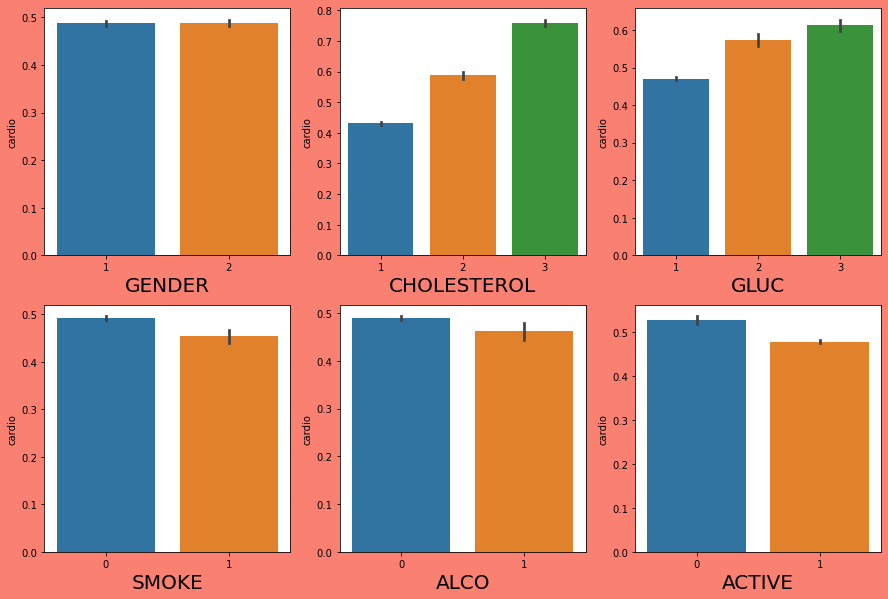

In [15]:
cate= cardio[['gender','cholesterol','gluc','smoke','alco','active']]

plt.figure(figsize=(15,10), facecolor='Salmon')
plotnumber = 1

for columns in cate:
    if plotnumber <=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.barplot(x=cate[columns], y=cardio.cardio, data= cardio)
        plt.xlabel(columns.upper(), fontsize = 20)
    plotnumber+=1    

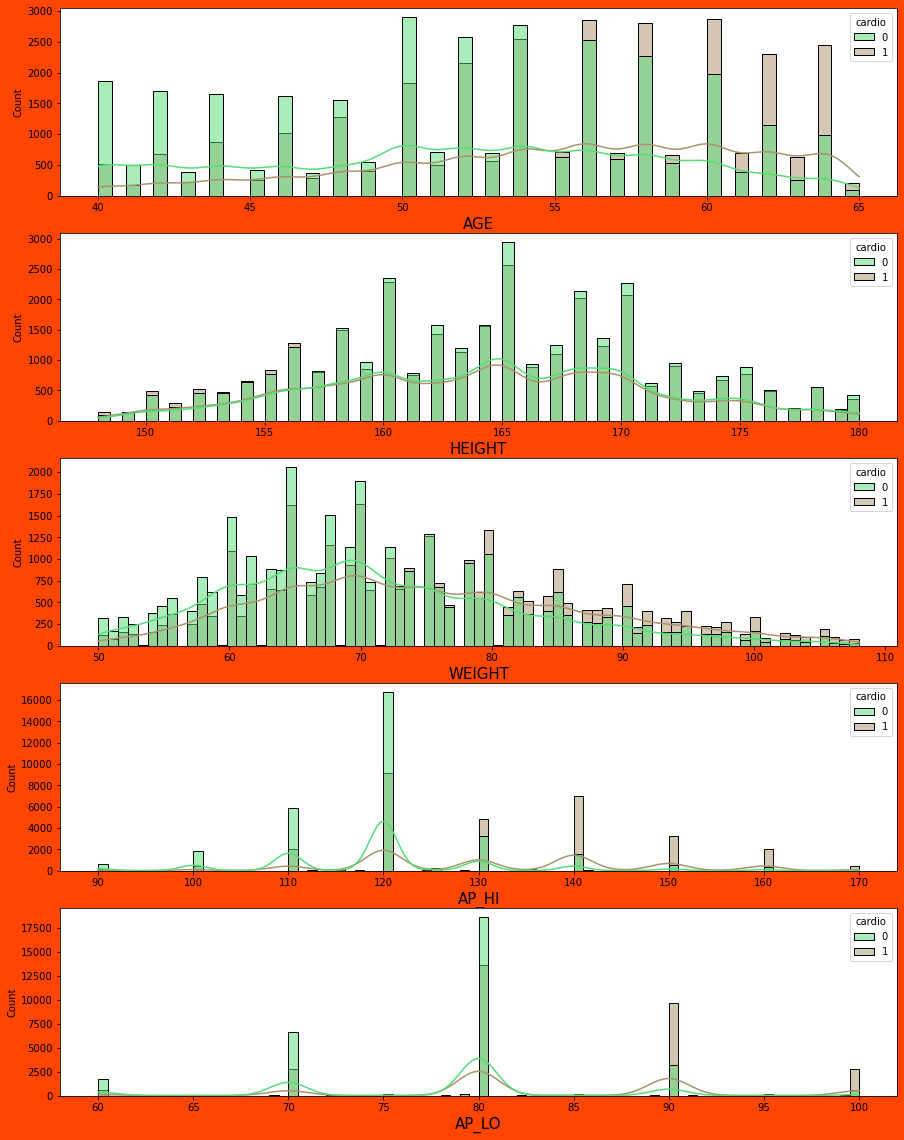

In [16]:
cont= cardio[['age','height','weight','ap_hi','ap_lo']]

plt.figure(figsize=(15,20), facecolor='OrangeRed')
plotnumber = 1

for columns in cont:
    if plotnumber <=5:
        ax=plt.subplot(5,1,plotnumber)
        sns.histplot(x= cont[columns], hue= cardio.cardio, 
                     data=cardio, palette='terrain', kde=True)
        plt.xlabel(columns.upper(), fontsize = 15)
    plotnumber+=1    

Plot heatmap with correlation of cardio

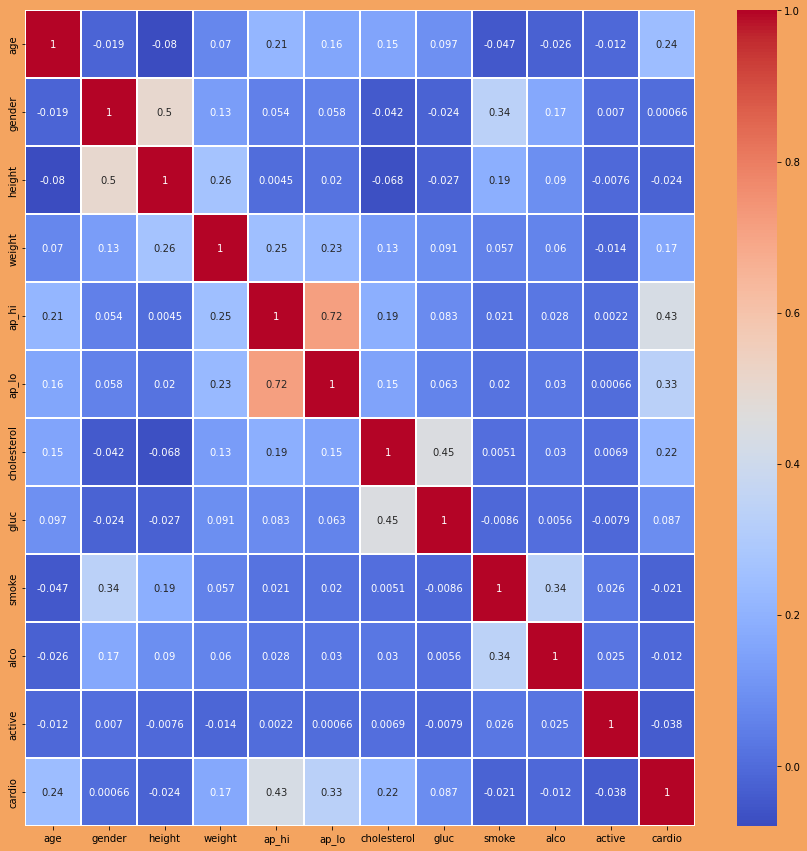

In [17]:
plt.figure(figsize=(15,15), facecolor='SandyBrown')
sns.heatmap(cardio.corr(), annot=True, cmap='coolwarm',linewidths=0.05);

Data looks good, 

Lets begin Model Training

### Classification 

Logistic Regression model to predict the cardio 

In [18]:
# Separating feature and output/result
X = cardio.drop(columns=['cardio'])
y = cardio.cardio

# Splting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

# Initializing Logistic regression 
lgr = LogisticRegression()

# Fitting Logistic modle
lgr.fit(X_train, y_train)

# Predict the model
y_pred = lgr.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
print('\n Classfication Report \n', classification_report(y_pred,y_test))

Accuracy Score 70.99379684673042

 Confusion Matrix 
 [[6100 2617]
 [1872 4887]]

 Classfication Report 
               precision    recall  f1-score   support

           0       0.77      0.70      0.73      8717
           1       0.65      0.72      0.69      6759

    accuracy                           0.71     15476
   macro avg       0.71      0.71      0.71     15476
weighted avg       0.72      0.71      0.71     15476



Accuracy of the model is 71% 

Lets try Standard Scaler to check accuracy

##### Standard Scaler 

In [19]:
# Initialize Scaler Model
scaler = StandardScaler()

# Apply scaler model
X_scaled =scaler.fit_transform(X)

# Spliting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=100)


# Fitting Logistic modle
lgr.fit(X_train, y_train)

# Predict the model
y_pred = lgr.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
print('\n Classfication Report \n', classification_report(y_pred,y_test))

Accuracy Score 71.97596278108038

 Confusion Matrix 
 [[6249 2614]
 [1723 4890]]

 Classfication Report 
               precision    recall  f1-score   support

           0       0.78      0.71      0.74      8863
           1       0.65      0.74      0.69      6613

    accuracy                           0.72     15476
   macro avg       0.72      0.72      0.72     15476
weighted avg       0.73      0.72      0.72     15476



Accuracy is 72% using standard scaler the result variance is not that much affected

Lets try Decision Tree and see 

### Decision Tree

In [20]:
# Spliting data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=250)

# Initializing Decision Tree
Class_tree= DecisionTreeClassifier(criterion= 'gini', max_depth= 3)

# Applying Decision Tree model to data
Class_tree.fit(X_train,y_train)

# Predict the model
y_pred = Class_tree.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
print('\n Classfication Report \n', classification_report(y_pred,y_test))

Accuracy Score 72.08581028689584

 Confusion Matrix 
 [[6118 2632]
 [1688 5038]]

 Classfication Report 
               precision    recall  f1-score   support

           0       0.78      0.70      0.74      8750
           1       0.66      0.75      0.70      6726

    accuracy                           0.72     15476
   macro avg       0.72      0.72      0.72     15476
weighted avg       0.73      0.72      0.72     15476



accuracy is still same.

lets do hyperparameter- tuning to see which tree gives best results

###  Hyperparameter Tuning 

In [21]:
# parameter's
param =  {
    'criterion': ['gini','entropy',"log_loss"],
    'max_depth' : range(6,15),
    'min_samples_leaf' : range(11,16),
    'max_features' : [ 'sqrt', 'log2' , None],
    'splitter' : ['best','random']
}

# Initializing Grid Search CV
grid_search = GridSearchCV(estimator=Class_tree,
                           param_grid=param, cv=5, n_jobs=-1)

#Applying Grid Search CV
grid_search.fit(X_train, y_train)


#Result
print('Grid Search Best Parameter',grid_search.best_params_)
print('Grid Search Best Score',grid_search.best_score_)

Grid Search Best Parameter {'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 15, 'splitter': 'random'}
Grid Search Best Score 0.7281480496925848


In [22]:
# Initializing Decision Tree
Class_tree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 8, max_features = None,
                                   min_samples_leaf= 15, splitter='random')

# Applying Decision Tree model to data
Class_tree.fit(X_train,y_train)

# Predict the model
y_pred = Class_tree.predict(X_test)

# Model Report/results
print('Accuracy Score', (accuracy_score(y_pred,y_test))*100)
print('\n Confusion Matrix \n', confusion_matrix(y_pred, y_test))
print('\n Classfication Report \n', classification_report(y_pred,y_test))


Accuracy Score 72.40242956836391

 Confusion Matrix 
 [[6338 2803]
 [1468 4867]]

 Classfication Report 
               precision    recall  f1-score   support

           0       0.81      0.69      0.75      9141
           1       0.63      0.77      0.70      6335

    accuracy                           0.72     15476
   macro avg       0.72      0.73      0.72     15476
weighted avg       0.74      0.72      0.73     15476



Accuracy Score is 72.4, even after hyperparameter tuning the result is same 